Se realizara una limpieza de datos donde se buscara las peliculas que tiene mayor probabilidad de ser puntuadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Realizamos una conexión con google Drive porque es donde se encuentra nuestro archivo.

In [4]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineria/NetflixOriginals.csv"
data = pd.read_csv(ruta, encoding="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [9]:
print(data.shape)
data.head

(579, 6)


<bound method NDFrame.head of                                            Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language

In [10]:
cols_cat = ["Title", "Genre", "Premiere", "Language"]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


Comenzaremos eliminando columnas vacias dentro del  documento

In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


In [11]:
cols_cat=["Title", "Genre", "Premiere", "Language"]

for col in cols_cat:
  print(f"Columna {col}: {data[col].nunique()} subniveles ")

Columna Title: 579 subniveles 
Columna Genre: 130 subniveles 
Columna Premiere: 397 subniveles 
Columna Language: 46 subniveles 


In [12]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


In [13]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


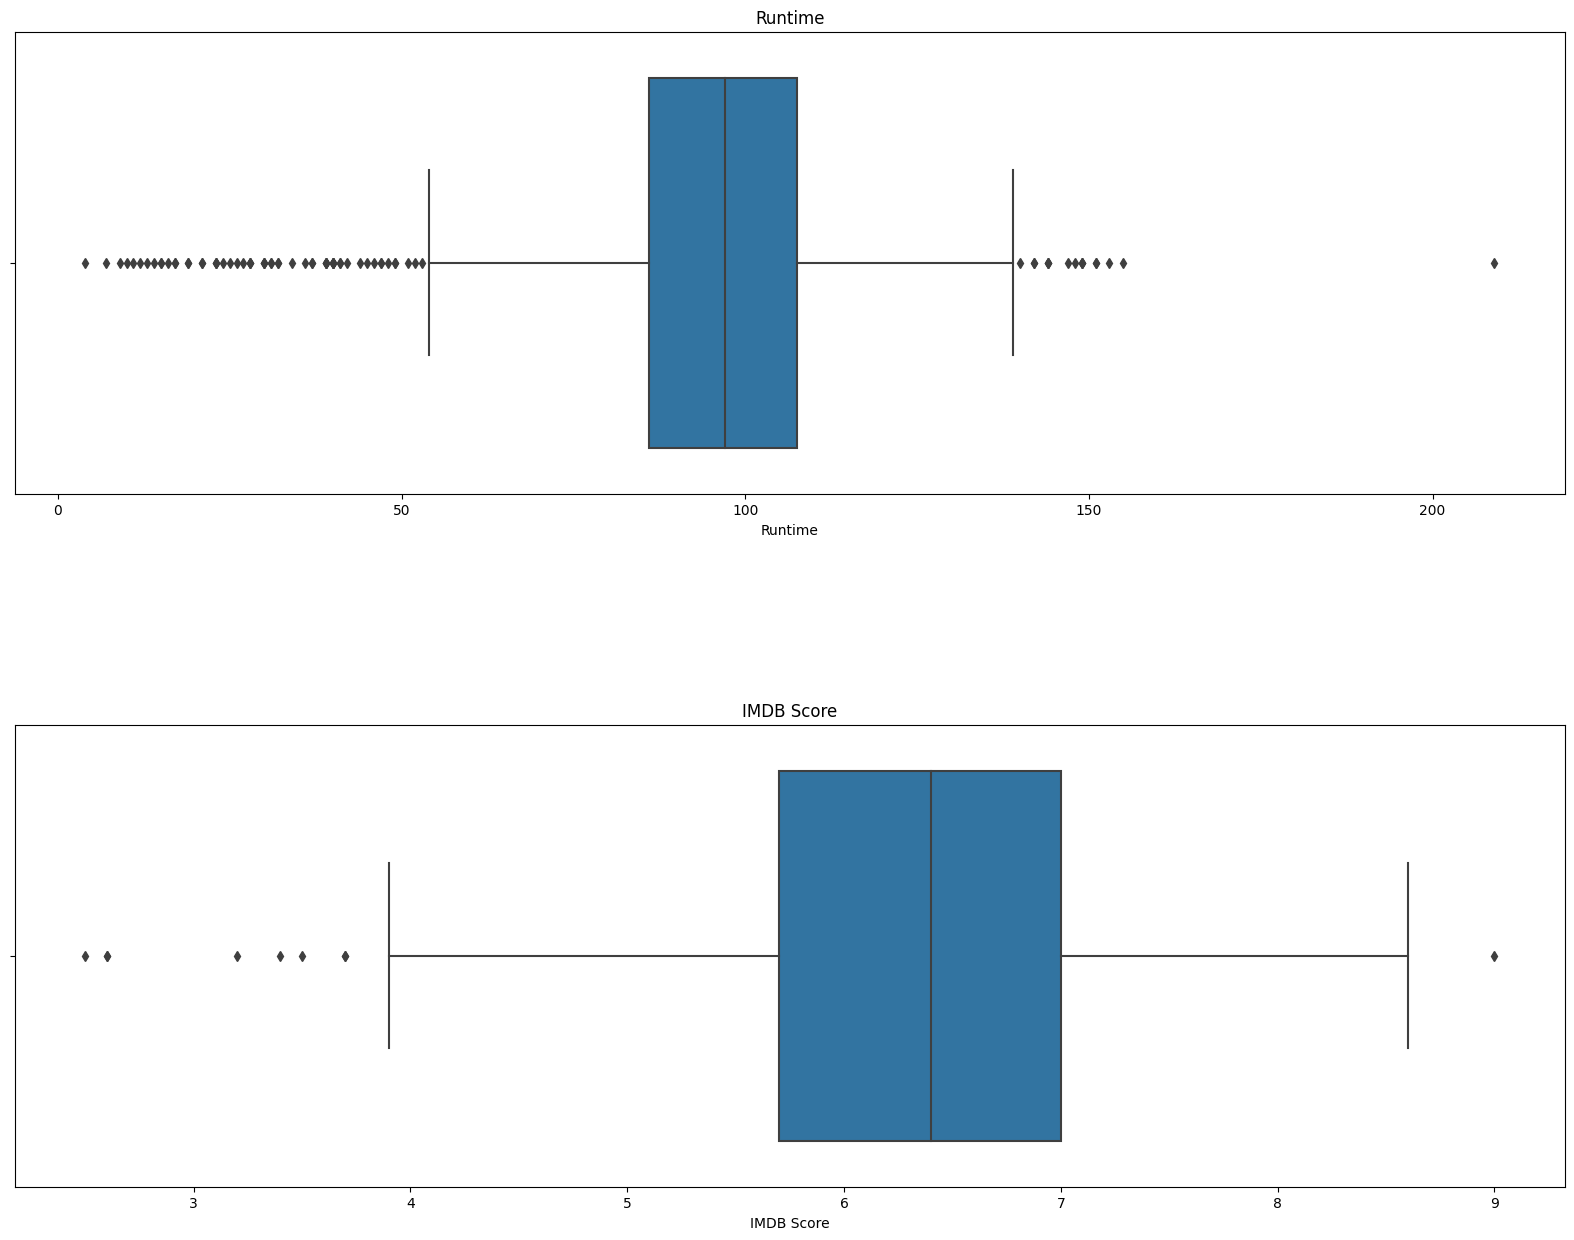

In [16]:
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Observaciones
- Run time la mayor parte de peliculas tiene una duración entre 10 y 50 horas.
- IMDB Score Tiene una media entre 6.5 y la mayor puntuación esta entre 3 y 4.

In [17]:
#Eliminar las columas con una duración mayor a 51 horas
print(f'Tamaño del set antes de eliminar registros de duracion: {data.shape}')
data = data[data['Runtime']<=51]
print(f'Tamaño del set después de eliminar registros de duracion: {data.shape}')

Tamaño del set antes de eliminar registros de duracion: (579, 6)
Tamaño del set después de eliminar registros de duracion: (59, 6)


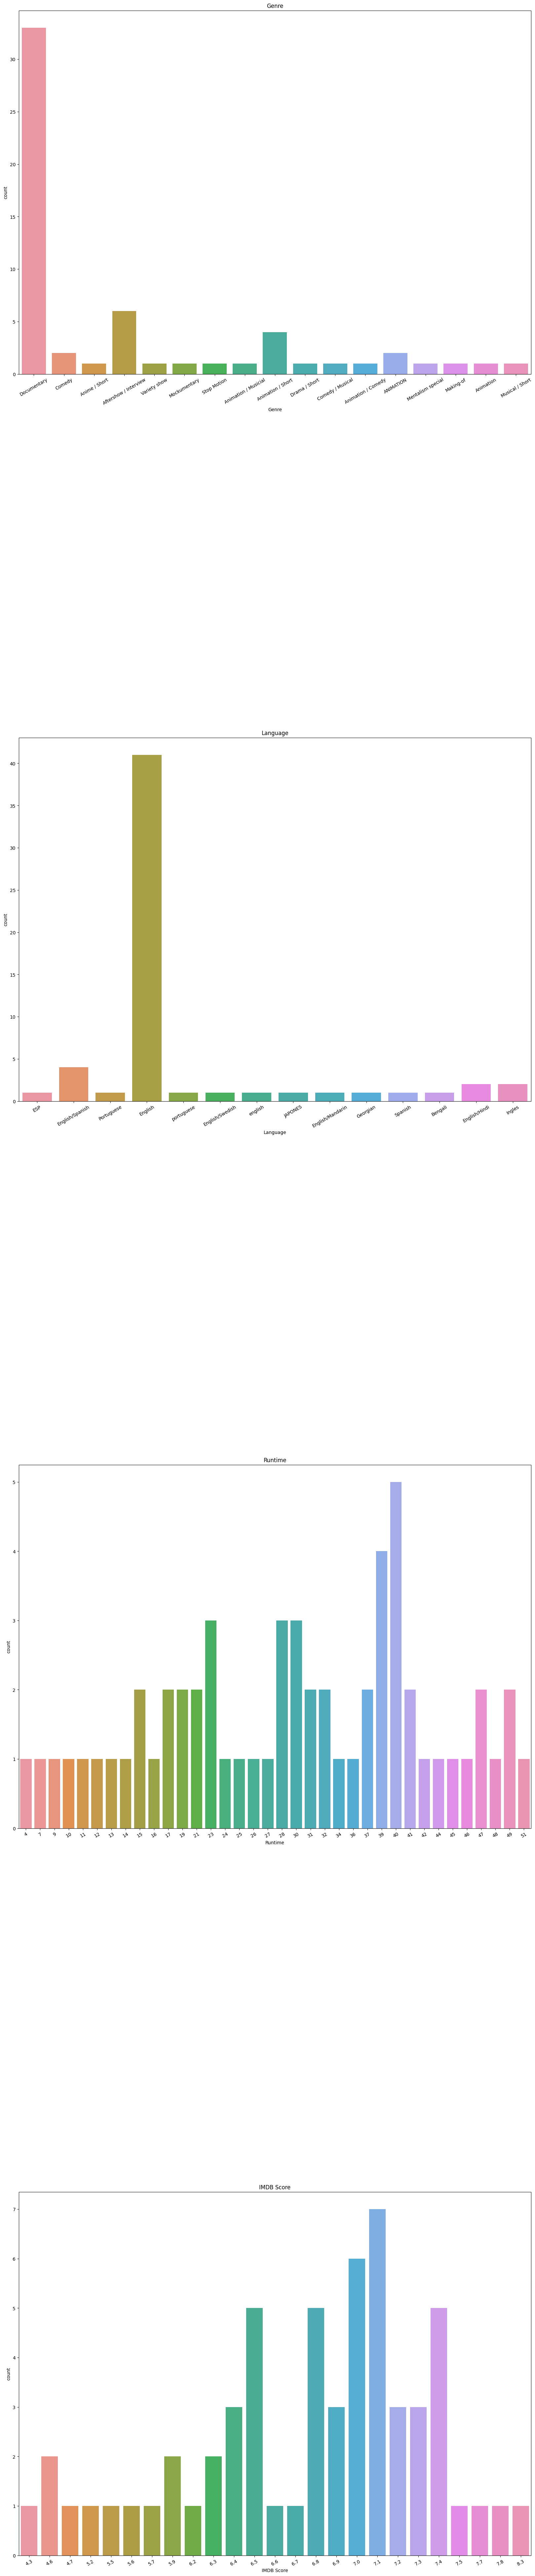

In [18]:
cols_cat = ['Genre', 'Language', 'Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20,100))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

En la columna Genre hay varios datos con Animation: Animation/musical, Animation/Short, Animation/Comedy, Animation y ANIMATION, por lo cual se van a unificar los datos para que se queden en uno solo.

In [19]:
print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('ANIMATION','Animation', regex=False)
print(data['Genre'].unique())

['Documentary' 'Comedy' 'Anime / Short' 'Aftershow / Interview'
 'Variety show' 'Mockumentary' 'Stop Motion' 'Animation / Musicial'
 'Animation / Short' 'Drama / Short' 'Comedy / Musical'
 'Animation / Comedy' 'ANIMATION' 'Mentalism special' 'Making-of'
 'Animation' 'Musical / Short']
['Documentary' 'Comedy' 'Anime / Short' 'Aftershow / Interview'
 'Variety show' 'Mockumentary' 'Stop Motion' 'Animation / Musicial'
 'Animation / Short' 'Drama / Short' 'Comedy / Musical'
 'Animation / Comedy' 'Animation' 'Mentalism special' 'Making-of'
 'Musical / Short']


<ipython-input-19-088a876e7406>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = data['Genre'].str.replace('ANIMATION','Animation', regex=False)


In [20]:
#En la columna Language tiene dos con portuges una con la primera letra minuscula y otra mayusculas.
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('portuguese','Portuguese', regex=False)
print(data['Language'].unique())

['ESP' 'English/Spanish' 'Portuguese' 'English' 'portuguese'
 'English/Swedish' 'english' 'JAPONES' 'English/Mandarin' 'Georgian'
 'Spanish' 'Bengali' 'English/Hindi' 'Ingles']
['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'english' 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi' 'Ingles']


<ipython-input-20-4769be6f3e2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = data['Language'].str.replace('portuguese','Portuguese', regex=False)


In [21]:


print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('Ingles','English', regex=False)
print(data['Language'].unique())


['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'english' 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi' 'Ingles']
['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'english' 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi']


<ipython-input-21-e5eaeb899cdb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = data['Language'].str.replace('Ingles','English', regex=False)


In [23]:

print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('english','English', regex=False)
print(data['Language'].unique())


['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'english' 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi']
['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi']


<ipython-input-23-96e3f96b27fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = data['Language'].str.replace('english','English', regex=False)


In [24]:
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('ESP','Spanish', regex=False)
print(data['Language'].unique())


['ESP' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'JAPONES' 'English/Mandarin' 'Georgian' 'Spanish' 'Bengali'
 'English/Hindi']
['Spanish' 'English/Spanish' 'Portuguese' 'English' 'English/Swedish'
 'JAPONES' 'English/Mandarin' 'Georgian' 'Bengali' 'English/Hindi']


<ipython-input-24-3711c0da6353>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = data['Language'].str.replace('ESP','Spanish', regex=False)


Despues de realizar la limpieza comenzamos con un total de 585 datos y terminamos con 59 datos limpios donde analizamos las graficas correspondientes combinando lenguajes y genero para que los datos quedaran mejor explicados.

In [26]:
data.shape

(59, 6)

In [28]:
ruta = "/gdrive/MyDrive/mineria/NetflixOriginals_cleaned_New.csv"
data.to_csv(ruta, index=False)